# Урок 3. Логистическая регрессия. Log Loss

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression


1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

In [2]:
# функция в изначальном виде

#def calc_logloss(y, y_pred):
 #   err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  #  err = np.sum(err)
   # return err


In [3]:
# функция в измененном виде, чтобы нули по возможности не попадали в np.log.

def calc_logloss(y, y_pred):
    
    y_pred = y_pred.astype(float)
    
    for i in range(y_pred.shape[0]):
        if y_pred[i] <= 0:
            y_pred[i] = 0.0000000000000001
        elif y_pred[i] >= 1:
            y_pred[i] = 0.9999999999999999
                
    return - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))

#проверка
y = np.array([1, 0])

y_pred1 = np.array([0, 1])
y_pred2 = np.array([1, 0])

calc_logloss(y, y_pred1), calc_logloss(y, y_pred2)

(36.78908102879092, 1.1102230246251565e-16)

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [5]:
def calc_std_feat(x):
    x[1:] = ((x[1:].T - x[1:].mean(axis=1)) / x[1:].std(axis=1)).T
    return x

In [6]:
standart_X = calc_std_feat(X)
standart_X

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [7]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [8]:

def eval_model(X, y, iterations, alpha=1e-4):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    ww = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        
        errors.append(err)
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    
    errors = np.array(errors)
    
    return errors, W

In [9]:
model = eval_model(
    X=standart_X,
    y=y,
    iterations=8000,
    alpha=1e-2
)

model[0][-2:]

800 [ 0.12476576 -1.07397425 -0.08162698  1.58560707] 0.4741488482536737
1600 [ 0.0604216  -1.38024056 -0.23325458  2.05293334] 0.4312793837310199
2400 [ 0.07238336 -1.61978426 -0.35850137  2.44522282] 0.4027979097629192
3200 [ 0.10007337 -1.81695757 -0.47019538  2.78034202] 0.3821992194612644
4000 [ 0.13189913 -1.98313357 -0.57227105  3.07313282] 0.36657662746472863
4800 [ 0.16501519 -2.1258425  -0.66710883  3.33365632] 0.3542697506136334
5600 [ 0.19846906 -2.25033852 -0.75626956  3.56897558] 0.3442668510882259
6400 [ 0.23184246 -2.36041983 -0.84082794  3.78419545] 0.3359225633916475
7200 [ 0.26492004 -2.45890906 -0.92155185  3.98309702] 0.32880898006635384
8000 [ 0.29758435 -2.54795134 -0.99900705  4.16854141] 0.3226327340772764


array([0.32263996, 0.32263273])

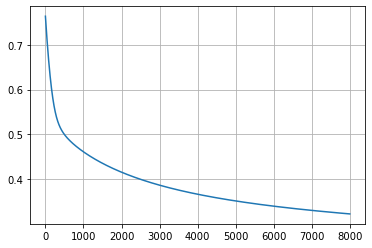

In [10]:
plt.plot(range(model[0].shape[0]),model[0])

plt.grid()
plt.show()

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [11]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    return sigmoid(z)


In [12]:
calc_pred_proba(model[1], standart_X)

array([0.26817224, 0.19529493, 0.94825573, 0.22971161, 0.63556251,
       0.32915552, 0.98148432, 0.16664581, 0.28886489, 0.91631105])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [13]:
def calc_pred(W, X):
    
    y_pred = calc_pred_proba(W, X)

    for i in range(y_pred.shape[0]):
        if y_pred[i] > 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    
    return y_pred

In [14]:
cp = calc_pred(model[1], standart_X) 
cp

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [15]:
#Accuracy
def accuracy(y, y_pred):
    
    acc = (y_pred == y).sum()/cp.shape[0]
    
    return acc


In [16]:
accuracy(y=y, y_pred=cp)

0.9

In [17]:
#матрица ошибок
def error_matrix(y, y_pred):
    
    TP = y * y_pred
    FP = y_pred - TP
    FN = y - TP
    TN = y**0 - TP - FP - FN
    
    return np.array([[TP.sum(), FP.sum()], 
                     [FN.sum(), TN.sum()]])

In [18]:
error_matrix(y=y, y_pred=cp)


array([[4., 0.],
       [1., 5.]])

In [19]:
#точность
def precision(em):
    return em[0,0]/(em[0,0]+em[0,1])

In [20]:
precision(error_matrix(y=y, y_pred=cp))

1.0

In [21]:
#полнота
def recall(em):
    return em[0,0]/(em[0,0]+em[1,0])

In [22]:
recall(error_matrix(y=y, y_pred=cp))

0.8

In [23]:
# F1 score
def F1_score(em):
    pre = precision(em)
    rec = recall(em)
    return (2*pre*rec)/(pre+rec)

In [24]:

F1_score(error_matrix(y=y, y_pred=cp))

0.888888888888889

6. Могла ли модель переобучиться? Почему?

Могла

не были использовани $L_1$ или $L_2$ регуляции

не было использовано минимальное значение

в исходной матрице малое количество объектов

7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.